<a href="https://colab.research.google.com/github/girish-kumar-l/data-analytics/blob/main/Indian_Premier_League.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

filepath = '/content/gdrive/My Drive/Colab Notebooks/matches.csv'
ipl = pd.read_csv(filepath, encoding= 'unicode_escape')
ipl.head()

Mounted at /content/gdrive


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#data Wrangling
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [4]:
#Lets look at the numeric values
ipl.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


1. **Data Cleansing**

In [4]:
#delete duplicates
ipl.duplicated().sum()
ipl = ipl.drop_duplicates()

In [5]:
#Blank cells and the quatum
for col in ipl.columns:
  pct_missing = ipl[col].isnull().mean()
  print(f'{col} - {pct_missing :.1%}')

id - 0.0%
season - 0.0%
city - 0.9%
date - 0.0%
team1 - 0.0%
team2 - 0.0%
toss_winner - 0.0%
toss_decision - 0.0%
result - 0.0%
dl_applied - 0.0%
winner - 0.5%
win_by_runs - 0.0%
win_by_wickets - 0.0%
player_of_match - 0.5%
venue - 0.0%
umpire1 - 0.3%
umpire2 - 0.3%
umpire3 - 84.3%


In [6]:
#handling Missing Values
copy = ipl.copy()
ipl['winner'] = ipl['winner'].fillna("Draw")
ipl['umpire1'] = ipl['umpire1'].fillna("Unkown")
ipl['umpire2'] = ipl['umpire2'].fillna("Unkown")
ipl['umpire3'] = ipl['umpire3'].fillna("Unkown")
ipl['city'] = ipl['city'].fillna("Unkown")
ipl['player_of_match'] = ipl['player_of_match'].fillna("Unkown")

#Check missing vlaues
ipl.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [7]:
#DataType conversion
ipl['date'] = pd.to_datetime(ipl['date'])
ipl['dl_applied'] = pd.to_numeric(ipl['dl_applied'])
ipl['win_by_runs'] = pd.to_numeric(ipl['win_by_runs'])
ipl['win_by_wickets'] = pd.to_numeric(ipl['win_by_wickets'])

In [8]:
#creating a separate column for month
ipl['Month'] = ipl['date'].dt.month_name()
#creating a separate column for day name
ipl['Day'] = ipl['date'].dt.day_name()
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Month,Day
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Unkown,April,Wednesday
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Unkown,April,Thursday
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Unkown,April,Friday
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Unkown,April,Saturday
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Unkown,Unkown,Unkown,April,Saturday


<Axes: ylabel='win_by_runs'>

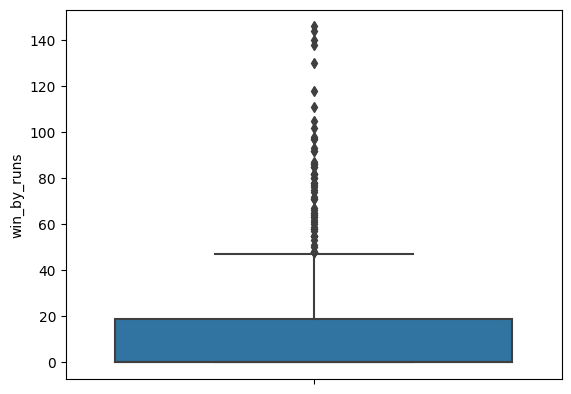

In [9]:
#Check on Win By Runs Distribution
sns.boxplot( y= 'win_by_runs' ,data =ipl)

<Axes: ylabel='win_by_wickets'>

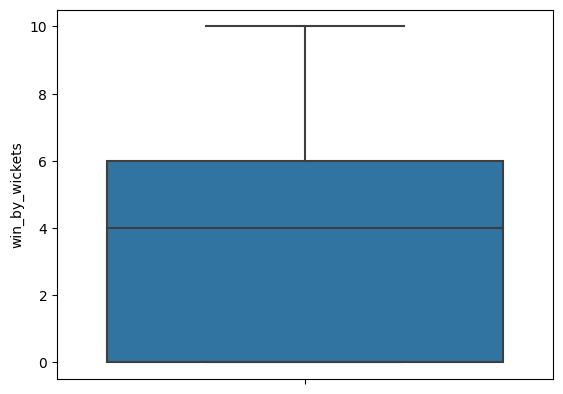

In [10]:
#Check on Win By Wickets Distribution
sns.boxplot( y= 'win_by_wickets' ,data =ipl)

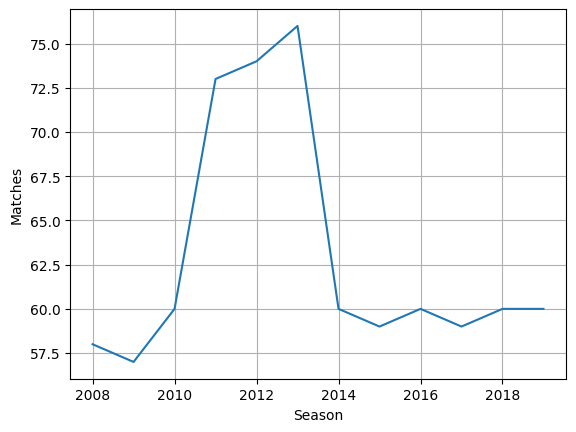

In [11]:
#total number of matches year-wise?
ipl['season'].value_counts()

#OR
seasonwise_breakup_of_matches = ipl.groupby('season').count().reset_index()
from matplotlib.ticker import StrMethodFormatter
plt.plot(seasonwise_breakup_of_matches['season'],seasonwise_breakup_of_matches['id'])
plt.xlabel('Season')
plt.ylabel('Matches')
plt.grid()
#formatter = StrMethodFormatter('{x:.0f}k')
#plt.gca().yaxis.set_major_formatter(formatter)
plt.show()



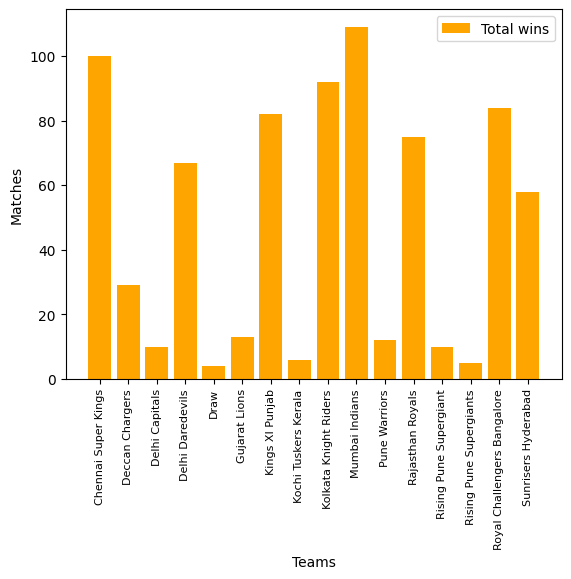

In [14]:
#Which team won the highest number of matches?
titles = ipl['winner'].value_counts()

#OR
titles = ipl.groupby('winner').count().reset_index()
plt.bar(titles['winner'],titles['id'], label = 'Total wins', color = 'orange')
plt.xticks(rotation = 'vertical',size = 8)
plt.ylabel("Matches")
plt.xlabel("Teams")
plt.legend()
plt.show()

Text(0, 0.5, 'Player Name')

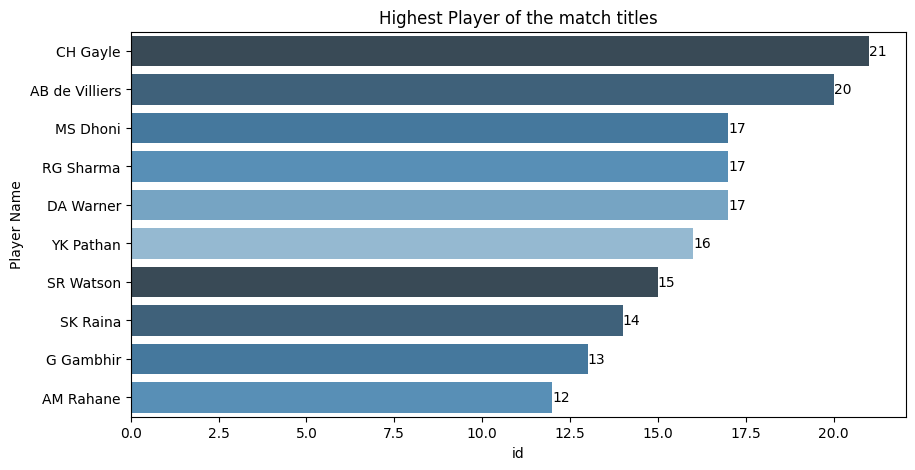

In [22]:
#Top 10 performers?
ipl['player_of_match'].value_counts()[0:10]

#OR

potm = ipl.groupby('player_of_match').count().reset_index()
potm = potm.sort_values('id', ascending = False).head(10)
Palette = sns.color_palette('Blues_d')
Palette.reverse()
plt.figure(figsize = (10,5))
ax =sns.barplot(y = 'player_of_match' , x= 'id' , data = potm, palette = Palette)
ax.bar_label(ax.containers[0])
plt.title('Highest Player of the match titles')
plt.ylabel('Player Name')

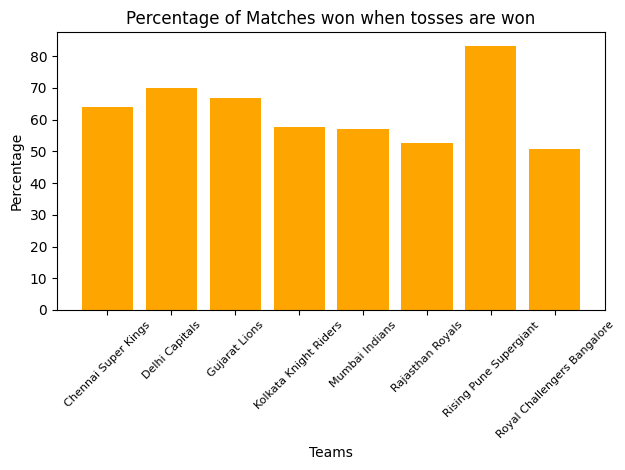

In [59]:
#Team wise win rate when toss are won?
grouped = ipl.groupby(['toss_winner', 'winner']).size().reset_index(name='count')
total_occurrences = ipl['toss_winner'].value_counts()
grouped['percentage'] = grouped.apply(lambda row: row['count'] / total_occurrences[row['toss_winner']] * 100, axis=1)
high_occurrence_values = grouped[grouped['percentage'] > 50]

plt.xticks(rotation = 'vertical',size = 8)
plt.bar(high_occurrence_values['toss_winner'], high_occurrence_values['percentage'], color='orange')
plt.xlabel('Teams')
plt.ylabel('Percentage')
plt.title('Percentage of Matches won when tosses are won')
plt.xticks(rotation=45)
plt.tight_layout()